#### Betting size

In [1]:
import numpy as np

from scipy.stats import norm, moment

import pandas as pd
from sklearn.neighbors import KernelDensity

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import datetime as dt

from FinancialMachineLearning.bet_sizing.ef3m import M2N, raw_moment

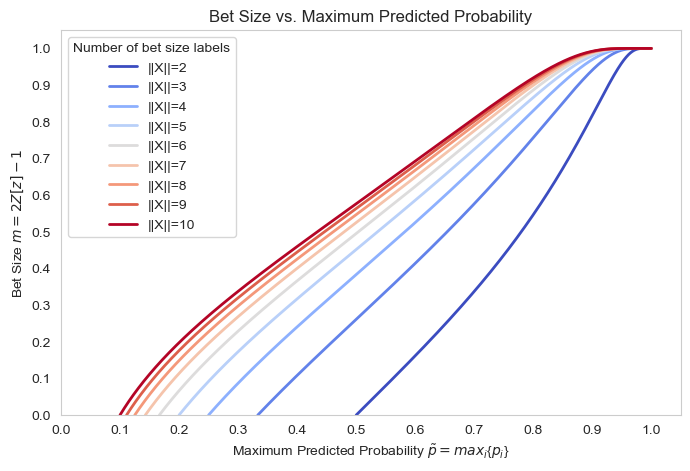

In [2]:
num_classes_list = [i for i in range(2, 11, 1)] 
n = 10000 
colors = iter(cm.coolwarm(np.linspace(0,1,len(num_classes_list))))

fig_10_1, ax_10_1 = plt.subplots(figsize=(8, 5))

for num_classes in num_classes_list:
    min_prob, max_prob = 1 / num_classes, 1
    P = np.linspace(min_prob, max_prob, n, endpoint=False) 
    z = (P - min_prob) / (P*(1-P))**0.5
    m = 2 * norm.cdf(z) - 1
    ax_10_1.plot(P, m, label=f"||X||={num_classes}", linewidth=2, alpha=1, color=colors.__next__())

ax_10_1.set_ylabel("Bet Size $m=2Z[z]-1$")
ax_10_1.set_xlabel(r"Maximum Predicted Probability $\tilde{p}=max_i${$p_i$}")
ax_10_1.set_title("Bet Size vs. Maximum Predicted Probability")
ax_10_1.set_xticks([0.1*i for i in range(11)])
ax_10_1.set_yticks([0.1*i for i in range(11)])
ax_10_1.legend(loc="upper left", title="Number of bet size labels")
ax_10_1.set_ylim((0,1.05))
ax_10_1.set_xlim((0, 1.05))
ax_10_1.grid(False)

plt.show()